In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
dot_com = pd.read_csv('/Users/pz/Desktop/IXIC.csv')
dot_com['Date'] = pd.to_datetime(dot_com['Date']) 
dot_com.index = dot_com['Date']
dot_com.drop(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], 1, inplace=True)
dot_com.columns = ['price']
dot_com.head()

,price
Date,
1992-01-02,586.450012
1992-01-03,592.650024
1992-01-06,597.900024
1992-01-07,602.289978
1992-01-08,610.320007


In [3]:
dot_com.tail()

,price
Date,
2017-12-22,6959.959961
2017-12-26,6936.250000
2017-12-27,6939.339844
2017-12-28,6950.160156
2017-12-29,6903.390137


In [4]:
bitcoin = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20060812&end=" + 
                                  time.strftime("%Y%m%d"), parse_dates=['Date'], index_col='Date')[0]
bitcoin['price'] = bitcoin['Close']
bitcoin.drop(['Volume', 'Market Cap','Open', 'High', 'Low', 'Close'], axis = 1, inplace = True)
#df = df.iloc[::-1]


In [5]:
def normalize(df):
    x = df[['price']].values.astype(float)
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)

def reindex_day(df):
    out = df.reindex(pd.date_range(start=df.index.min(), end=df.index.max(), freq='1D'))      
    out = out.interpolate(method='time')
    out.reset_index(inplace=True)
    out.drop(['index'], 1, inplace=True)
    return normalize(out)


dot_com_mask = (dot_com.index > '1995-1-1') & (dot_com.index <= '2005-1-1')
dot_com_day = reindex_day(dot_com[dot_com_mask])
bitcoin_mask = (bitcoin.index > '2012-1-1')
bitcoin_day = reindex_day(bitcoin[bitcoin_mask])
bitcoin_last_day = reindex_day(bitcoin[(bitcoin.index > '2012-1-1') & (bitcoin.index <= '2019-1-1')])

In [6]:
dot_com_day


,0
0,0.000000
1,0.000525
2,0.000483
3,0.001419
4,0.001605
5,0.001791
6,0.001977
7,0.003006
8,0.002825
9,0.003003


In [7]:
bitcoin_last_day

,0
0,0.003386
1,0.003917
2,0.003632
3,0.002499
4,0.001893
5,0.001509
6,0.002268
7,0.002444
8,0.002258
9,0.002217


In [8]:
def get_paddings(*args):
    maxima = []
    for var in args:
        maxima.append(var.idxmax().item())
    return max(maxima) - np.array(maxima)
    
pads = get_paddings(dot_com_day, bitcoin_day, bitcoin_last_day)

In [9]:
pads

array([  0, 200, 200])

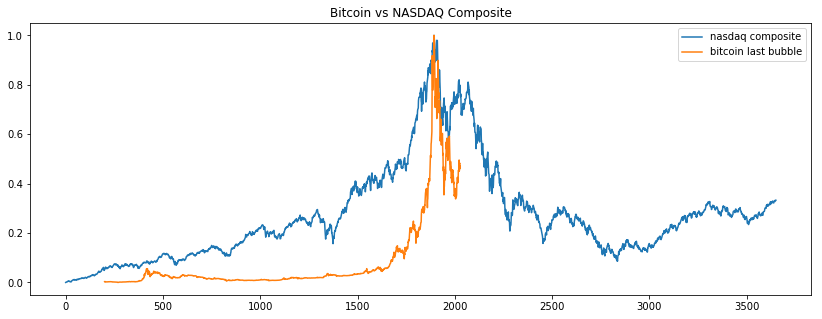

In [12]:
# Plots
fig, ax = plt.subplots(1, figsize=(14, 5))
#ax.plot(np.arange(pads[0], pads[0]+len(tulip_day)),tulip_day, '-', label='tulip')
#ax.plot(np.arange(pads[1], pads[1]+len(south_sea_day)), south_sea_day, '-', label='south seas')
ax.plot(np.arange(pads[0], pads[0]+len(dot_com_day)), dot_com_day, '-', label='nasdaq composite')
#ax.plot(np.arange(pads[1], pads[1]+len(bitcoin_day)), bitcoin_day, '-', label='bitcoin')
ax.plot(np.arange(pads[2], pads[2]+len(bitcoin_last_day)), bitcoin_last_day, '-', label='bitcoin last bubble')
#ax.plot(np.arange(pads[5], pads[5]+len(amazon_day)), amazon_day, '-', label='AMZN')
plt.title('Bitcoin vs NASDAQ Composite')

plt.legend()
plt.show()
fig.savefig("Bitcoin vs Dotcom.png")